In [14]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline 

In [15]:

import pandas as pd
df = pd.read_csv('E:/Datasets/weat.csv')
df.head(5)

,OutLook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes


In [16]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder() #Label encoding
df['OutLook']=label_enco.fit_transform(df['OutLook'])
df['Play']=label_enco.fit_transform(df['Play'])
df

,OutLook,Temperature,Humidity,Windy,Play
0,2,hot,high,FALSE,0
1,2,hot,high,TRUE,0
2,0,hot,high,FALSE,1
3,1,mild,high,FALSE,1
4,1,cool,normal,FALSE,1
5,1,cool,normal,TRUE,0
6,0,cool,normal,TRUE,1
7,2,mild,high,FALSE,0
8,2,cool,normal,FALSE,1
9,1,mild,normal,FALSE,1


In [17]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
print(d.columns)
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])
df

Index(['Temperature', 'Humidity', 'Windy'], dtype='object')


,OutLook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,2,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,2,0
6,0,0,1,2,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [18]:
Y=df['Play']
del df['Play']
X=df
X

,OutLook,Temperature,Humidity,Windy
0,2,1,0,0
1,2,1,0,2
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,2
6,0,0,1,2
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=1)

In [20]:
print(X_trainset.shape,"n",X_testset.shape)

(11, 4) n (3, 4)


In [ ]:
print(y_trainset.shape,"  ",y_testset.shape)

(364,)    (156,)


Predicted :[0 1 0]Actual:7    0
4    1
1    0
Name: Play, dtype: int32
Accuracy:  1.0
3


[Text(113.933,201.996,'X[0] <= 0.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(75.9556,157.108,'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(151.911,157.108,'X[1] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(75.9556,112.22,'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(37.9778,67.332,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(113.933,67.332,'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(75.9556,22.444,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(151.911,22.444,'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(227.867,112.22,'X[3] <= 1.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(189.889,67.332,'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(265.844,67.332,'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(227.867,22.444,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(303.822,22.444,'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

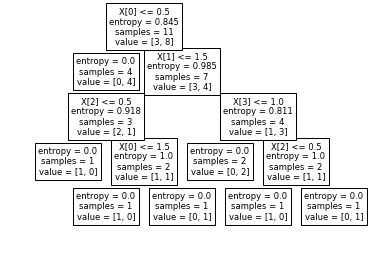

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#drugTree = DecisionTreeRegressor(criterion="entropy", max_depth = 5)
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
dt.fit(X_trainset,y_trainset)
predTree = dt.predict(X_testset)
print(str('Predicted :')+str(predTree)+str('Actual:')+str(y_testset))
print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print(len(predTree))
tree.plot_tree(drugTree)

In [28]:
print(precision_score(y_testset,  predTree, average='macro'))
print(precision_score(y_testset,  predTree, average='micro'))
print(precision_score(y_testset,  predTree, average='weighted'))

1.0
1.0
1.0


In [29]:
print(recall_score(y_testset, predTree, average='micro'))

1.0


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [31]:
from sklearn.naive_bayes import GaussianNB
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)
gnb = GaussianNB()
nfit=gnb.fit(X_trainset,y_trainset)
npred=nfit.predict(X_testset)
print(classification_report(y_testset,npred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [32]:
print("Accuracy: ", metrics.accuracy_score(y_testset,npred))

Accuracy:  0.6


In [33]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=0)

In [35]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainset,y_trainset)

#Predict the response for test dataset
y_pred = clf.predict(X_testset)
print("Accuracy:",metrics.accuracy_score(y_testset, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_testset, y_pred))

print("Classification Report")
print(classification_report(y_testset, y_pred))

Accuracy: 0.2
Confusion Matrix:
[[0 0]
 [4 1]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.20      0.33         5

    accuracy                           0.20         5
   macro avg       0.50      0.10      0.17         5
weighted avg       1.00      0.20      0.33         5



C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.neighbors import KNeighborsClassifier

modeln = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
modeln.fit(X_trainset,y_trainset)

#Predict the response for test dataset
y_pred1 = modeln.predict(X_testset)
print("Accuracy:",metrics.accuracy_score(y_testset, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_testset, y_pred1))

print("Classification Report")
print(classification_report(y_testset, y_pred1))

Accuracy: 0.2
Confusion Matrix:
[[0 0]
 [4 1]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.20      0.33         5

    accuracy                           0.20         5
   macro avg       0.50      0.10      0.17         5
weighted avg       1.00      0.20      0.33         5



C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
